[View in Colaboratory](https://colab.research.google.com/github/agerk/machineLearning/blob/master/1_mnist_keras.ipynb)

**MNIST with Keras**


**Load liberaries**

In [0]:
!pip install -q -U tensorflow==1.8.0
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.8.0'

**Step 1: Download MNIST dataset **

In [3]:
# download train and test data as a numpy tuple from Keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


**Step 2: EDA**

Label: 3


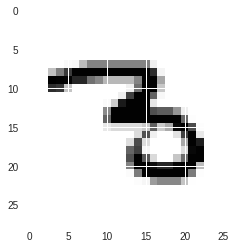

In [23]:
# plot sample data
# create a random ids to select images

%matplotlib inline
i = random.randint(0, 100)
print("Label: %s" % train_labels[i])
plt.imshow(train_images[i])

**Step 3: Understand data format**

In [38]:
print("train dims (num of sample, w, h: ", train_images.shape)
print("train labels length: ", train_labels.shape)

# check data type
print("train data type: ", train_images.dtype)
print("test data type: ", test_images.dtype)

train dims (num of sample, w, h:  (60000, 28, 28)
train labels length:  (60000,)
train data type:  uint8
test data type:  uint8


**Step 4: Reformat inputs**

- Flattens the 2D wxhx1 gray scale image to 1D
- Convert the pixel value from 0 to 250 to a number between 0 and 1-- normalization

In [0]:
# Get sample size
training_zise = len(train_images)
test_size = len(test_images)

# Reshape images from (N,28,28) to (N, 28x28)
# use numpy reshape method
train_images = np.reshape(train_images, (training_zise, 784))
test_images = np.reshape(test_images, (test_size, 784))

# Convert datatype from unit8 to float32
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

# Normalize pixel values to make sure that the optimizer don't spend much emphasis on skewed values
train_images /= 255    # divide pixel value by 255
test_images /= 255

**Step 5: Encode Labels to one-hot-encoding**

In [40]:
# Use Keras utils.to_catagorical method to one-hot-encode train and test lables
NUM_DIGITS = 10

# training labels
print("Before encoding training labels: ", train_labels[0])
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_DIGITS)
print("After: ", train_labels[0])

# test labels
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_DIGITS)

Before encoding training labels:  5
After:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Step 6: Build Model using Keras Sequential API**
- use single layer with 
- 512 hidden units
- ReLu activation function
- softmax for the output layer (argmax value)
- loss function: categorical crossentropy-- information gain
- RMSProp for optimization

In [43]:
# STEP 1: Create Model 

# instantiate model 
model = tf.keras.Sequential()    
# creat model architecture with dense layer
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
# output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# STEP 2: Compile model 
model.compile(loss='categorical_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

# STEP 3: Get model summary abot architecture, parameters etc
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Step 7: Training model with example inputs**

In [44]:
# Train model using fit method
# Assign number of epochs-- number of times the model will see the entire training set
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.2084 - acc: 0.9389
Epoch 2/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.0939 - acc: 0.9734
Epoch 3/5
26848/60000 [============>.................] - ETA: 6s - loss: 0.0681 - acc: 0.9817

60000/60000 [==============================] - 12s 207us/step - loss: 0.0683 - acc: 0.9806
Epoch 4/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.0552 - acc: 0.9847
Epoch 5/5
42816/60000 [====================>.........] - ETA: 3s - loss: 0.0448 - acc: 0.9878

60000/60000 [==============================] - 12s 202us/step - loss: 0.0451 - acc: 0.9876


**Step 8: Validation of model and parameter tuning**

In [48]:
# Get loss and accuracy using evaluate method
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accurcy: %.2f' % (accuracy))
print('Test loss: %.2f' % (loss))

10000/10000 [==============================] - 0s 41us/step
Test accurcy: 0.98
Test loss: 0.09


- *This tutorial is inspired by Google 2018 I/O demo by Josh Gordan*